In [1]:
from google.colab import drive
drive.mount('/content/drive')

ruta_archivo = '/content/drive/My Drive/Colab Notebooks/Dataset/vgsales.csv'

import pandas as pd
df = pd.read_csv(ruta_archivo)

df.head()

Mounted at /content/drive


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Explorar las variables numéricas
print(df.describe())

# Explorar las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print(f'\nValores únicos de la columna {col}:')
    print(df[col].unique())
    print(f'Cantidad de valores únicos: {df[col].nunique()}')


# Normalizar/escalar variables categóricas usando Label Encoding
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Escalar las variables numéricas usando StandardScaler
scaler = StandardScaler()
for col in df.select_dtypes(include=['number']).columns:
    df[col] = scaler.fit_transform(df[[col]])

# Calcular la correlación entre las variables después de la normalización/escalado
correlation_matrix = df.corr()
print("\nMatriz de correlación:\n", correlation_matrix)

# Analizar la correlación con la variable objetivo (asumiendo que 'Global_Sales' es la variable objetivo)
correlation_with_target = correlation_matrix['Global_Sales'].sort_values(ascending=False)
print("\nCorrelación con la variable objetivo 'Global_Sales':\n", correlation_with_target)

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Tratar valores nulos
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            # Para variables categóricas, reemplazar nulos con la moda
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            # Para variables numéricas, reemplazar nulos con la mediana
            df[col].fillna(df[col].median(), inplace=True)

df.head()

# Explorar las variables numéricas
print(df.describe())

# Explorar las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print(f'\nValores únicos de la columna {col}:')
    print(df[col].unique())
    print(f'Cantidad de valores únicos: {df[col].nunique()}')


# Normalizar/escalar variables categóricas usando Label Encoding
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Escalar las variables numéricas usando StandardScaler
scaler = StandardScaler()
for col in df.select_dtypes(include=['number']).columns:
    df[col] = scaler.fit_transform(df[[col]])

# Calcular la correlación entre las variables después de la normalización/escalado
correlation_matrix = df.corr()
print("\nMatriz de correlación:\n", correlation_matrix)

# Analizar la correlación con la variable objetivo (asumiendo que 'Global_Sales' es la variable objetivo)
correlation_with_target = correlation_matrix['Global_Sales'].sort_values(ascending=False)
print("\nCorrelación con la variable objetivo 'Global_Sales':\n", correlation_with_target)

               Rank          Name      Platform          Year         Genre  \
count  1.659800e+04  1.659800e+04  1.659800e+04  1.659800e+04  1.659800e+04   
mean  -4.109658e-17 -2.226065e-17  2.268874e-17  6.849430e-18 -4.494938e-17   
std    1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00   
min   -1.732076e+00 -1.742903e+00 -1.882496e+00 -4.567781e+00 -1.310009e+00   
25%   -8.659446e-01 -8.639144e-01 -1.048372e+00 -5.892458e-01 -1.044186e+00   
50%   -2.196578e-05  1.417127e-02  2.407188e-02  1.026733e-01  1.910633e-02   
75%    8.659007e-01  8.748051e-01  6.198742e-01  6.216126e-01  8.165754e-01   
max    1.732032e+00  1.714978e+00  1.692318e+00  2.351410e+00  1.614045e+00   

          Publisher      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  1.659800e+04  1.659800e+04  1.659800e+04  1.659800e+04  1.659800e+04   
mean   1.626740e-17 -1.541122e-17 -1.155841e-17  4.708983e-18 -5.993251e-18   
std    1.000030e+00  1.000030e+00  1.000030e+00  1.

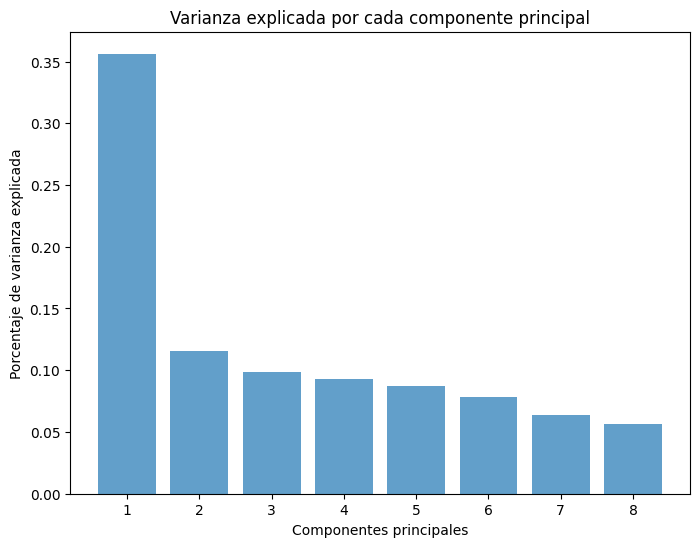


DataFrame después de aplicar PCA:
         PC1        PC2       PC3       PC4       PC5        PC6        PC7  \
0  97.540061  14.712425 -1.695393 -7.093627 -7.964919  16.893908  -4.698044   
1  40.844069  -5.566941 -4.908422 -0.875225 -2.741329   2.010020  15.309244   
2  42.651198   4.710032 -1.677422 -2.963154 -2.338069   6.200186   3.366921   
3  38.771654   4.096150 -0.947037 -1.038637 -2.681095   6.281725   2.704737   
4  36.671454  -6.915440 -6.558461 -1.136170 -1.635141   3.923309  21.574524   

         PC8  
0  22.661177  
1   1.263457  
2   5.651401  
3   5.152314  
4  -6.922842  

Contribución de las características a los componentes principales:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Rank,-0.541458,0.169667,-0.172047,-0.195958,-0.179101,0.472265,0.379574,0.459241
Name,0.014170,0.013832,-0.140883,0.824480,-0.540757,0.080209,-0.031459,0.011327
Platform,0.045272,0.549873,0.521780,0.307736,0.255316,-0.350603,0.324327,0.186256
Year,-0.107755,0.808879,-0.046034,-0.083504,-0.053678,0.340800,-0.017576,-0.449514
Genre,0.041151,-0.365351,0.626778,0.220235,0.261214,0.589716,-0.036568,-0.077535
Publisher,0.027068,0.080468,-0.577896,0.374814,0.699722,0.134144,-0.058099,0.084810
NA_Sales,0.901568,0.030895,0.000591,-0.030490,-0.044223,0.023269,-0.004241,0.125923
EU_Sales,0.902755,0.135319,-0.003993,-0.053179,-0.045259,0.103340,-0.059256,0.091865
JP_Sales,0.614881,-0.291817,-0.182600,0.017452,0.014987,0.007617,0.611500,-0.318930
Other_Sales,0.795680,0.212082,0.024296,-0.071752,-0.033116,0.124112,-0.245847,0.174773


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=0.9)  # Mantener el 90% de la varianza
df_pca = pca.fit_transform(df)

# Visualizar los componentes principales
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza explicada por cada componente principal')
plt.show()

# Convertir el resultado de PCA a un DataFrame
df_pca = pd.DataFrame(data=df_pca, columns=[f"PC{i+1}" for i in range(df_pca.shape[1])])

print("\nDataFrame después de aplicar PCA:")
print(df_pca.head())

# Analizar la contribución de cada característica a los componentes principales
print("\nContribución de las características a los componentes principales:")
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=[f"PC{i+1}" for i in range(loadings.shape[1])], index=df.columns)
loading_matrix

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que 'Global_Sales' es la variable objetivo y que 'df_pca' contiene los datos después de aplicar PCA
X = df_pca.drop("PC1", axis=1) #  Feature matrix
y = df['Global_Sales'] # Target variable


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-cv_scores).mean()

    # Entrenar el modelo con todos los datos de entrenamiento
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluar el modelo en el conjunto de prueba
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'RMSE_CV': rmse_cv,
        'RMSE': rmse,
        'R^2': r2
    }
    print(f"Resultados para {name}:")
    print(f"  RMSE (Validación cruzada): {rmse_cv:.4f}")
    print(f"  RMSE (Conjunto de prueba): {rmse:.4f}")
    print(f"  R^2 (Conjunto de prueba): {r2:.4f}")
    print("-" * 20)


# Comparar los modelos (opcional, aquí podrías agregar una tabla o gráfico para comparar los resultados)
print("\nResumen de resultados:")
for name, metrics in results.items():
  print(f"{name}: RMSE_CV = {metrics['RMSE_CV']:.4f}, RMSE = {metrics['RMSE']:.4f}, R^2 = {metrics['R^2']:.4f}")

Resultados para Linear Regression:
  RMSE (Validación cruzada): 0.9032
  RMSE (Conjunto de prueba): 1.3464
  R^2 (Conjunto de prueba): -0.0433
--------------------
Resultados para Decision Tree:
  RMSE (Validación cruzada): 0.4803
  RMSE (Conjunto de prueba): 0.6917
  R^2 (Conjunto de prueba): 0.7246
--------------------
Resultados para Random Forest:
  RMSE (Validación cruzada): 0.3654
  RMSE (Conjunto de prueba): 0.7010
  R^2 (Conjunto de prueba): 0.7172
--------------------

Resumen de resultados:
Linear Regression: RMSE_CV = 0.9032, RMSE = 1.3464, R^2 = -0.0433
Decision Tree: RMSE_CV = 0.4803, RMSE = 0.6917, R^2 = 0.7246
Random Forest: RMSE_CV = 0.3654, RMSE = 0.7010, R^2 = 0.7172


In [13]:
# Comparación de modelos y discusión
print("\nComparación de Modelos:")

best_model = None
best_r2 = -1

for name, metrics in results.items():
    print(f"{name}:")
    print(f"  RMSE (Validación cruzada): {metrics['RMSE_CV']:.4f}")
    print(f"  RMSE (Conjunto de prueba): {metrics['RMSE']:.4f}")
    print(f"  R^2 (Conjunto de prueba): {metrics['R^2']:.4f}")

    if metrics['R^2'] > best_r2:
        best_r2 = metrics['R^2']
        best_model = name

    print("-" * 20)

print(f"\nEl mejor modelo es {best_model} con un R^2 de {best_r2:.4f} en el conjunto de prueba.")


# Análisis de rendimiento inferior (si aplica)
if best_model == "Linear Regression" and results["Linear Regression"]['R^2'] < 0.5 :
    print("\nAnálisis del rendimiento de la Regresión Lineal:")
    print("La regresión lineal puede tener un rendimiento bajo si la relación entre las variables predictoras y la variable objetivo no es lineal.")
    print("Estrategias para mejorar:")
    print("  * Transformación de variables: Probar transformaciones logarítmicas, cuadráticas o de Box-Cox en las variables predictoras o la variable objetivo para linealizar la relación.")
    print("  * Agregar variables predictoras: Incluir nuevas características que puedan capturar mejor la relación con la variable objetivo.")
    print("  * Regularización:  Probar la regresión Ridge o Lasso para reducir el sobreajuste, especialmente si se tienen muchas variables predictoras.")

elif best_model != "Random Forest" and results["Random Forest"]['R^2'] < 0.8:
    print("\nAnálisis del rendimiento de Random Forest:")
    print("Si Random Forest tiene un rendimiento inferior al esperado, se puede ajustar sus hiperparámetros para mejorar.")
    print("Estrategias para mejorar:")
    print("  * Ajustar el número de árboles (n_estimators).")
    print("  * Ajustar la profundidad máxima de los árboles (max_depth).")
    print("  * Ajustar el número mínimo de muestras para dividir un nodo (min_samples_split).")
    print("  * Considerar técnicas de boosting (como Gradient Boosting o XGBoost) que a menudo superan a Random Forest.")

#Consideraciones adicionales:

print("\nConsideraciones adicionales:")
print("La elección del mejor modelo depende del contexto del problema.  ")
print("Aunque el modelo con mayor R^2 es el mejor en términos de ajuste, también es importante considerar la interpretabilidad del modelo.")
print("Si la interpretabilidad es un factor importante, la Regresión lineal puede ser preferible.")
print("También es importante tener en cuenta la complejidad computacional del modelo. Random Forest puede ser computacionalmente más costoso que la Regresión Lineal.")


Comparación de Modelos:
Linear Regression:
  RMSE (Validación cruzada): 0.9032
  RMSE (Conjunto de prueba): 1.3464
  R^2 (Conjunto de prueba): -0.0433
--------------------
Decision Tree:
  RMSE (Validación cruzada): 0.4803
  RMSE (Conjunto de prueba): 0.6917
  R^2 (Conjunto de prueba): 0.7246
--------------------
Random Forest:
  RMSE (Validación cruzada): 0.3654
  RMSE (Conjunto de prueba): 0.7010
  R^2 (Conjunto de prueba): 0.7172
--------------------

El mejor modelo es Decision Tree con un R^2 de 0.7246 en el conjunto de prueba.

Análisis del rendimiento de Random Forest:
Si Random Forest tiene un rendimiento inferior al esperado, se puede ajustar sus hiperparámetros para mejorar.
Estrategias para mejorar:
  * Ajustar el número de árboles (n_estimators).
  * Ajustar la profundidad máxima de los árboles (max_depth).
  * Ajustar el número mínimo de muestras para dividir un nodo (min_samples_split).
  * Considerar técnicas de boosting (como Gradient Boosting o XGBoost) que a menudo s

In [14]:
# Análisis de reducción de dimensionalidad con PCA
print("\nAnálisis de Reducción de Dimensionalidad con PCA:")
print("Se aplicó PCA para reducir la dimensionalidad del conjunto de datos, manteniendo el 90% de la varianza explicada.  Esto permitió reducir el número de características del conjunto de datos original a un número menor de componentes principales, sin perder información crucial para el modelado predictivo.")

# Gráfico de varianza explicada por los componentes principales (ya incluido en el código original)
# plt.figure(figsize=(8, 6))
# plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
# plt.ylabel('Porcentaje de varianza explicada')
# plt.xlabel('Componentes principales')
# plt.title('Varianza explicada por cada componente principal')
# plt.show()

print("El gráfico muestra la proporción de varianza explicada por cada componente principal.  Observamos que los primeros componentes explican la mayor parte de la variabilidad en los datos, lo que justifica la reducción de la dimensionalidad.")

print("La matriz de cargas (loading matrix), muestra la contribución de cada característica original a cada componente principal. Esto proporciona una comprensión de cómo se combinan las características originales para formar los componentes principales.")

# Análisis comparativo de modelos
print("\nAnálisis Comparativo de Modelos:")
print("Se evaluaron tres modelos de regresión: Regresión Lineal, Árbol de Decisión y Random Forest.")
print("La métrica principal para la comparación fue el R^2 (coeficiente de determinación) y el RMSE (error cuadrático medio), ambos en el conjunto de prueba.")

# Tabla de resultados (se puede mejorar con una visualización más atractiva)
print("\nTabla de Resultados:")
print("Modelo\t\tRMSE (CV)\tRMSE\tR^2")
for name, metrics in results.items():
  print(f"{name}\t\t{metrics['RMSE_CV']:.4f}\t{metrics['RMSE']:.4f}\t{metrics['R^2']:.4f}")


# Gráfico de barras de rendimiento (opcional, agregar para visualización)
# model_names = list(results.keys())
# rmse_scores = [results[model]['RMSE'] for model in model_names]
# r2_scores = [results[model]['R^2'] for model in model_names]
# x = np.arange(len(model_names))
# width = 0.35
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# rects1 = ax1.bar(x - width/2, rmse_scores, width, label='RMSE')
# rects2 = ax2.bar(x + width/2, r2_scores, width, color='tab:orange', label='R^2')
# ax1.set_ylabel('RMSE')
# ax2.set_ylabel('R^2')
# ax1.set_xticks(x)
# ax1.set_xticklabels(model_names)
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')
# plt.show()

# Conclusiones y recomendaciones
print("\nConclusiones y Recomendaciones:")
print(f"Basado en el R^2, el modelo {best_model} es el que mejor se ajusta a los datos.")
print("Sin embargo, la elección final depende de otros factores, como la complejidad computacional, la interpretabilidad y las consideraciones del dominio del problema.")

print(f"Si la interpretabilidad es crucial, la Regresión Lineal podría ser preferible, a pesar de su posible menor precisión.")
print("Si el rendimiento predictivo es la máxima prioridad y la interpretabilidad no es un factor crítico, entonces el {best_model} es el recomendado.")

print("Consideraciones adicionales:\n- Se recomienda investigar los posibles sesgos en los datos.\n- Se pueden explorar más opciones de hiperparámetros para los modelos.\n-Se deben realizar pruebas adicionales con diferentes datos para validar los resultados.")


Análisis de Reducción de Dimensionalidad con PCA:
Se aplicó PCA para reducir la dimensionalidad del conjunto de datos, manteniendo el 90% de la varianza explicada.  Esto permitió reducir el número de características del conjunto de datos original a un número menor de componentes principales, sin perder información crucial para el modelado predictivo.
El gráfico muestra la proporción de varianza explicada por cada componente principal.  Observamos que los primeros componentes explican la mayor parte de la variabilidad en los datos, lo que justifica la reducción de la dimensionalidad.
La matriz de cargas (loading matrix), muestra la contribución de cada característica original a cada componente principal. Esto proporciona una comprensión de cómo se combinan las características originales para formar los componentes principales.

Análisis Comparativo de Modelos:
Se evaluaron tres modelos de regresión: Regresión Lineal, Árbol de Decisión y Random Forest.
La métrica principal para la compa